In [11]:
import numpy as np 
import pandas as pd 
import pickle 

In [12]:
dataset = pd.read_csv('sales.csv')
dataset.head()

,rate,sales_in_first_month,sales_in_second_month,sales_in_third_month
0,NaN,2,500,300
1,NaN,4,300,650
2,four,600,200,400
3,nine,450,320,650
4,seven,600,250,350


In [13]:
dataset.dtypes

rate                     object
sales_in_first_month      int64
sales_in_second_month     int64
sales_in_third_month      int64
dtype: object

In [14]:
dataset.describe

<bound method NDFrame.describe of     rate  sales_in_first_month  sales_in_second_month  sales_in_third_month
0    NaN                     2                    500                   300
1    NaN                     4                    300                   650
2   four                   600                    200                   400
3   nine                   450                    320                   650
4  seven                   600                    250                   350
5   five                   550                    200                   700>

In [19]:
dataset['rate'].fillna(0,inplace = True)

In [20]:
dataset

,rate,sales_in_first_month,sales_in_second_month,sales_in_third_month
0,0,2,500,300
1,0,4,300,650
2,four,600,200,400
3,nine,450,320,650
4,seven,600,250,350
5,five,550,200,700


In [22]:
first_mean = dataset['sales_in_first_month'].mean()
print(first_mean)

367.6666666666667


In [23]:
dataset['sales_in_first_month'].fillna(first_mean,inplace = True)

In [24]:
dataset

,rate,sales_in_first_month,sales_in_second_month,sales_in_third_month
0,0,2,500,300
1,0,4,300,650
2,four,600,200,400
3,nine,450,320,650
4,seven,600,250,350
5,five,550,200,700


In [25]:
def convert_2_int(word):
    word_dict = {
        'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8,
        'nine': 9, 'ten': 10, 'eleven': 11, 'twelve': 12, 'zero': 1, 0: 0
    }
    return word_dict[word]

In [26]:
dataset['rate'] = dataset['rate'].apply(lambda x: convert_2_int(x))

In [27]:
dataset

,rate,sales_in_first_month,sales_in_second_month,sales_in_third_month
0,0,2,500,300
1,0,4,300,650
2,4,600,200,400
3,9,450,320,650
4,7,600,250,350
5,5,550,200,700


array([[<AxesSubplot:xlabel='rate', ylabel='rate'>,
        <AxesSubplot:xlabel='sales_in_first_month', ylabel='rate'>,
        <AxesSubplot:xlabel='sales_in_second_month', ylabel='rate'>,
        <AxesSubplot:xlabel='sales_in_third_month', ylabel='rate'>],
       [<AxesSubplot:xlabel='rate', ylabel='sales_in_first_month'>,
        <AxesSubplot:xlabel='sales_in_first_month', ylabel='sales_in_first_month'>,
        <AxesSubplot:xlabel='sales_in_second_month', ylabel='sales_in_first_month'>,
        <AxesSubplot:xlabel='sales_in_third_month', ylabel='sales_in_first_month'>],
       [<AxesSubplot:xlabel='rate', ylabel='sales_in_second_month'>,
        <AxesSubplot:xlabel='sales_in_first_month', ylabel='sales_in_second_month'>,
        <AxesSubplot:xlabel='sales_in_second_month', ylabel='sales_in_second_month'>,
        <AxesSubplot:xlabel='sales_in_third_month', ylabel='sales_in_second_month'>],
       [<AxesSubplot:xlabel='rate', ylabel='sales_in_third_month'>,
        <AxesSubplot:xlabe

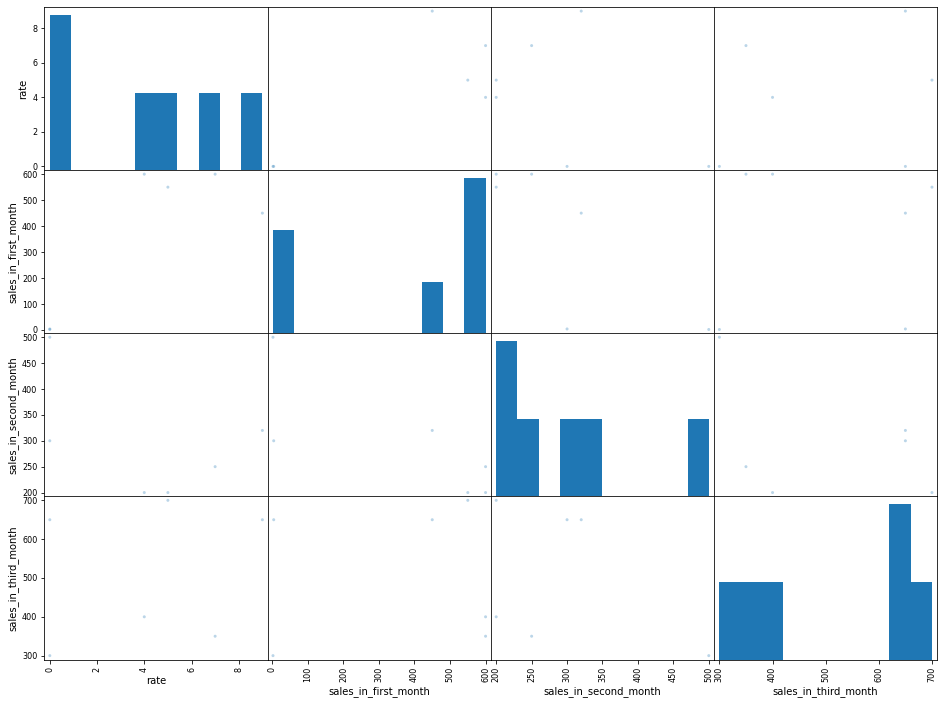

In [28]:
pd.plotting.scatter_matrix(dataset,figsize = (16,12), alpha = 0.3)

In [29]:
#Take 2 month for training ande predict third month
X = dataset.iloc[:,:3]

In [30]:
X

,rate,sales_in_first_month,sales_in_second_month
0,0,2,500
1,0,4,300
2,4,600,200
3,9,450,320
4,7,600,250
5,5,550,200


In [31]:
# Third month
y = dataset.iloc[:,-1]
y

0    300
1    650
2    400
3    650
4    350
5    700
Name: sales_in_third_month, dtype: int64

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [34]:
model.fit(X,y)

LinearRegression()

In [42]:
pickle.dump(model,open('model.pkl','wb'))

In [46]:
pickle.dump(model,open('model.pickle','wb'))

In [44]:
model = pickle.load(open('model.pkl','rb'))

In [45]:
print(model.predict([[4,300,500]]))

[143.3072588]
